In [13]:
# Setup autoreload
%load_ext autoreload
%autoreload 2

# Give yourself access to common and parent modules
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


                    inflationAdjSalary       PTS        FG        FT   
inflationAdjSalary            1.000000  0.608712  0.608288  0.582650  \
seasonStartYear               0.112485  0.014975  0.013966 -0.032163   
MP                            0.521036  0.911916  0.916213  0.793108   
PTS                           0.608712  1.000000  0.992055  0.921746   
Age                           0.204802 -0.000752 -0.002627 -0.022984   
games                         0.273483  0.665225  0.675750  0.548856   
games_started                 0.536045  0.793135  0.803855  0.695470   
PER                           0.512236  0.671910  0.669994  0.664980   
FTr                           0.081944  0.031812  0.004186  0.225690   
AST                           0.408424  0.691412  0.671668  0.625394   
STL                           0.410752  0.770670  0.761629  0.678185   
TRB                           0.515467  0.682263  0.715104  0.637629   
FT                            0.582650  0.921746  0.885288  1.00

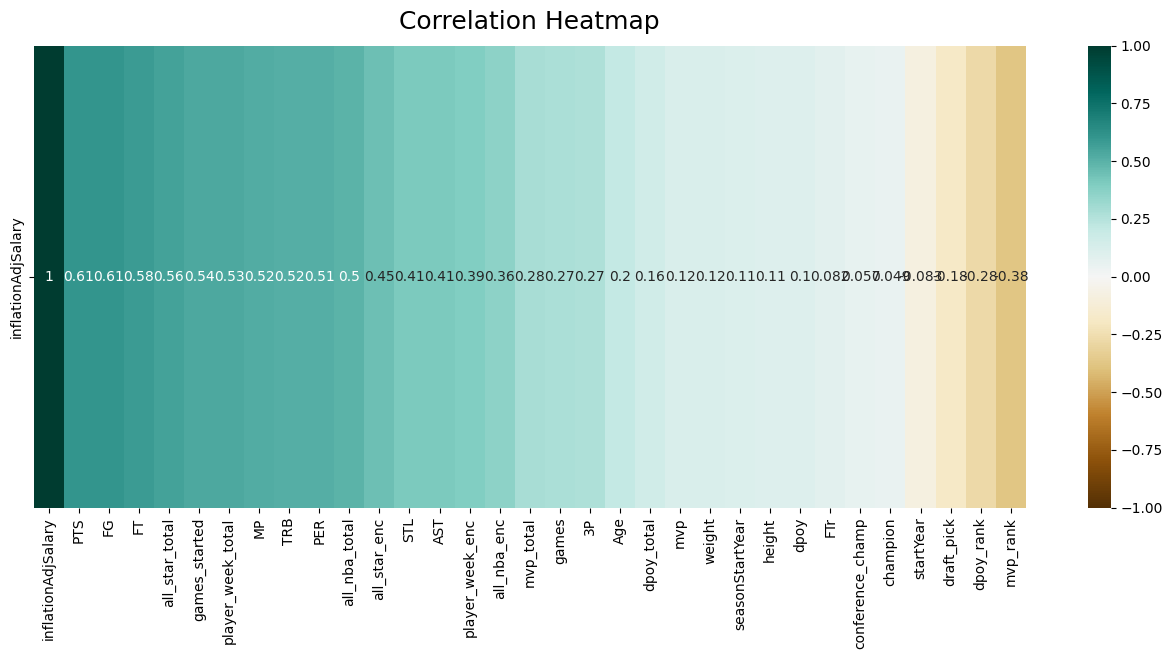

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from common import get_cleaned_external_data
import numpy as np

data = get_cleaned_external_data()
# data = data[['inflationAdjSalary_log','MP', 'PTS', 'Age', 'games_started', 'PER', 'AST', 'STL', 'TRB', '3P']]
# sns.heatmap(data.corr())

out = data.corr()
out = pd.concat([out.loc[['inflationAdjSalary']], out.drop('inflationAdjSalary')])
sort_indices = np.argsort(out.loc['inflationAdjSalary'])[::-1]
out = out.iloc[:, sort_indices]
print(out)

plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(out.iloc[0:1], vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('./graphs/heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

with open('graph.html', 'w') as file:
    file.write((out.iloc[0:1]).to_html())
